# Statistical Analysis
Med Students Learning Analytics Group  
Coded by: Kathryn Linehan, June 2018

Statistical analysis of master.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import warnings
from sklearn.utils import resample

%matplotlib inline

warnings.filterwarnings("ignore", message="The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.")

In [2]:
# bootstrap function to find confidence interval for the difference of means from two independent samples

def bootstrap_CI(data1, data2, num_iterations, conf_level):
    
    # conf_level is not given as a percent.  For example, conf_level = 95 for a 95% CI.

    diff_means = list()
    
    for i in range(num_iterations):
        
        # sample with replacement from data1 and data2
        x = resample(data1)
        y = resample(data2)
        
        # calculate difference of means for these two samples
        dm = x.mean() - y.mean()
        
        # add the statistic into the list
        diff_means.append(dm)
        
    # calculate the confidence interval
    
    alpha = (100 - conf_level)/2
    
    #plt.hist(diff_means)
    
    low = np.percentile(diff_means, alpha)
    high = np.percentile(diff_means, 100-alpha)
    
    return low, high

In [3]:
# read in the data and take a look at the first 5 instances

df = pd.read_csv("./master.csv")
pd.set_option('display.max_columns', 75)
course_grades = df.loc[:,'m1f_limbs':'m2s_psychiatry']
GPA = course_grades.mean(axis=1)
df['gpa'] = GPA
df.head()

,student_id,m1_fall,mcat_zscore,mcat_total_attempts,bachelor_1,bachelor_2,bachelor_3,master_1,master_2,master_3,associate_1,associate_2,biochem_likelyhood,gem_indicator,race,race_indic,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,step1_raw_score,step1_z_score,step1_pass_indicator,repeat_indic,dropout_indic,step1_total_attempts,target_indicator,double_bachelor,master_degree,double_master,associate_degree,science_undergrad,science_master,gpa
0,30705306,200930,2.505529,1.0,Science,NaN,NaN,Science,NaN,NaN,NaN,NaN,4.0,0.0,White,5.0,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,NaN,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,269.0,2.178880,1.0,0.0,0.0,1.0,0,0,1,0,0,1,1,3.409091
1,22721624,200930,-1.407328,2.0,Science,NaN,NaN,Science,NaN,NaN,Science,NaN,1.0,1.0,Black or African American,3.0,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,210.0,-0.836599,1.0,0.0,0.0,1.0,0,0,1,0,1,1,1,2.318182
2,35604291,200930,0.745614,1.0,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,White,5.0,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,241.0,0.747805,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,2.454545
3,23250759,200930,0.149933,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,White,5.0,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,224.0,-0.121062,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,2.727273
4,23269092,200930,-0.973841,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,Asian,2.0,F,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,197.0,-1.501027,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,2.052632


In [4]:
df.shape

(1777, 54)

## 1. Feature distributions 

Most of our features are discrete (categorical) data.  The features that are continuous are mcat_zscore, gpa, step1_raw_score, and step1_z_score.

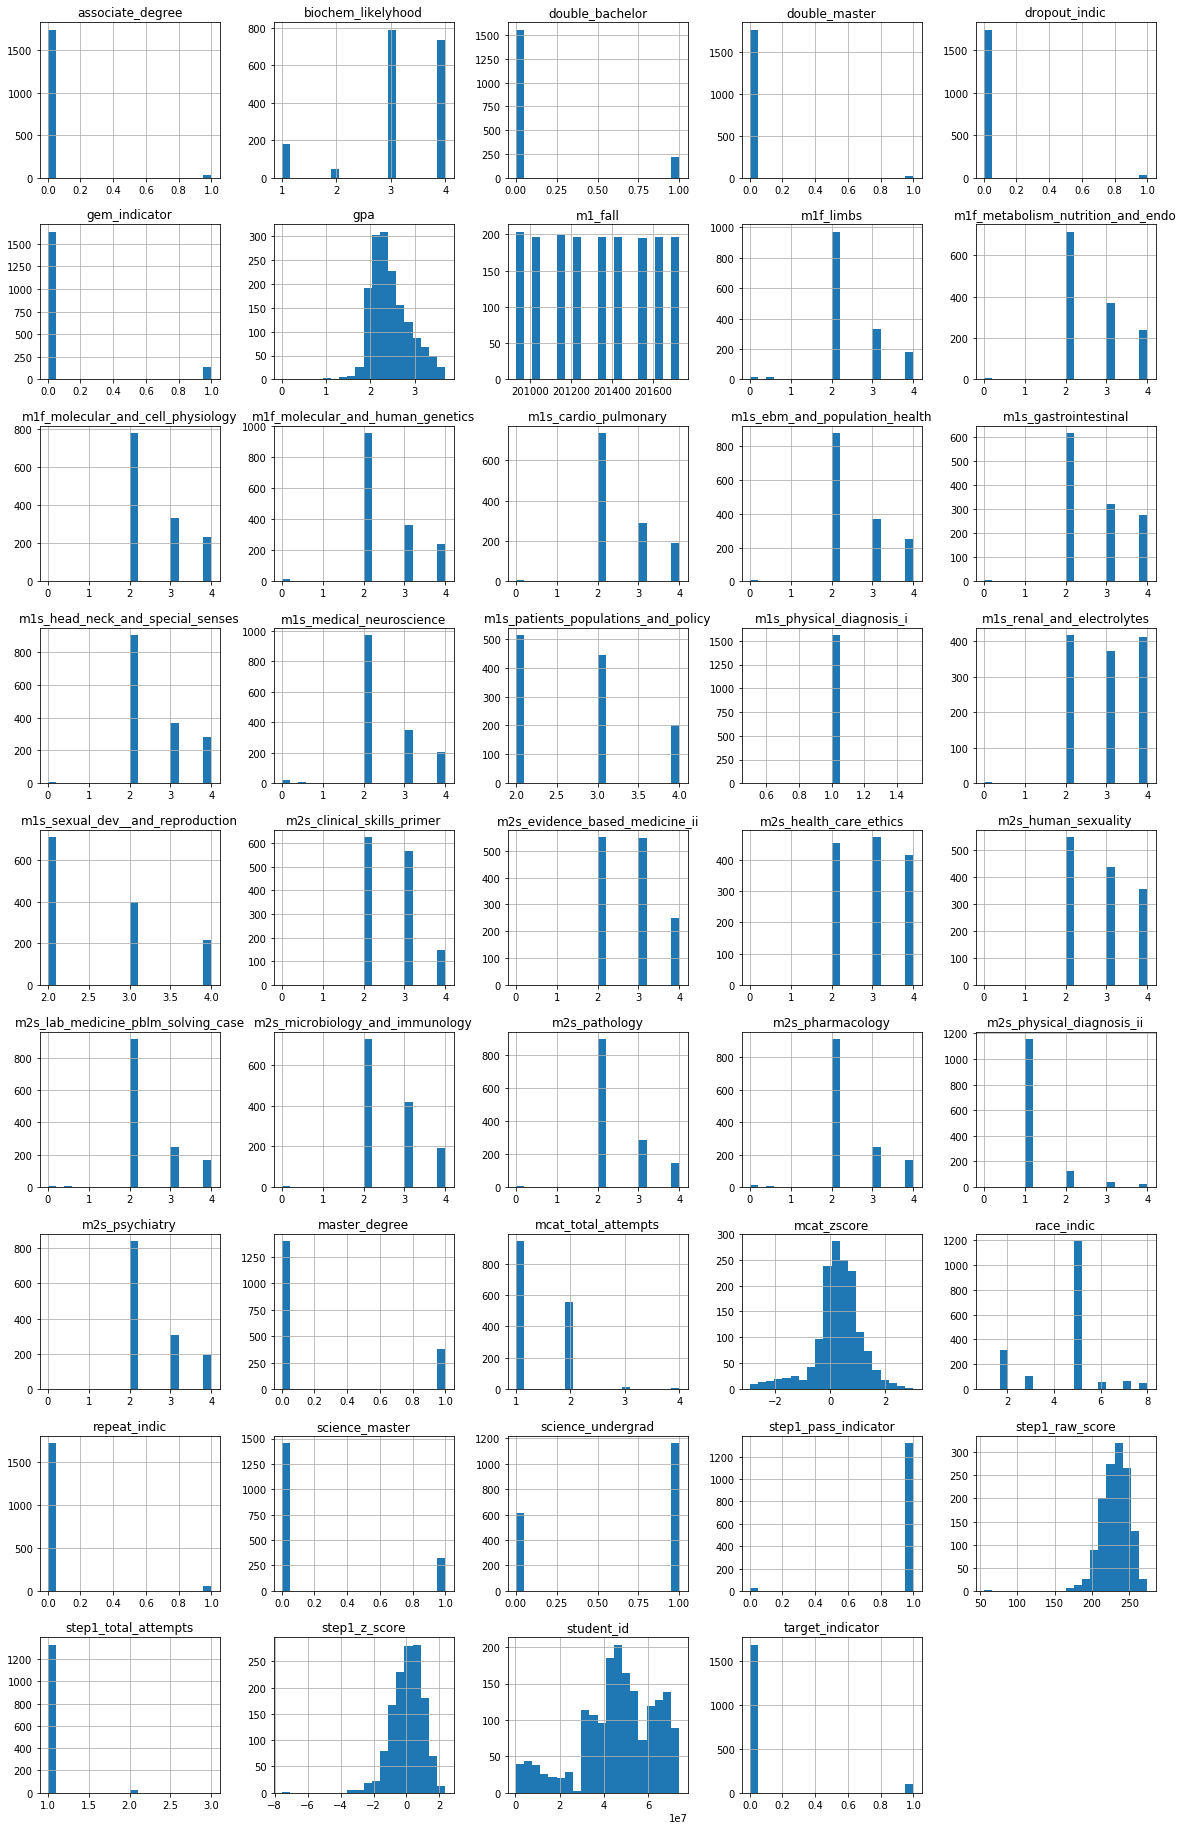

In [5]:
# histograms of the numerical features

df.hist(figsize=(20,40), layout=(11,5), bins=20);


The features gpa, mcat_zscore, step1_raw_score, and step1_z_score look approximately normal.  All other features are not.  The other features are discrete (categorical) data.


## 2. Feature relationships 

### Regression Analysis

First, we check if our continuous features are correlated.  Then we check if our course grade data is correlated.

#### Continuous Features

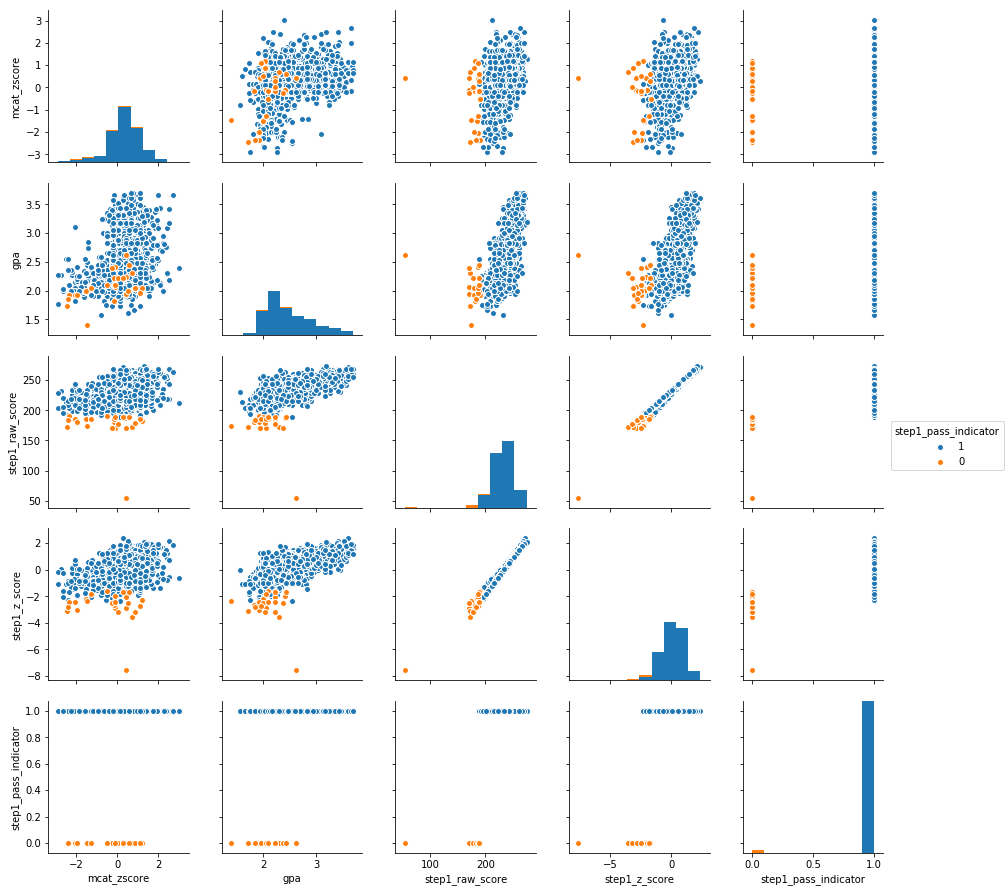

In [6]:
# continuous features correlation?

temp = df[['mcat_zscore','gpa','step1_raw_score','step1_z_score', 'step1_pass_indicator']].copy()

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp=temp.dropna()
sns.pairplot(temp, hue='step1_pass_indicator', hue_order=[1,0])

It is clear that step1_raw_score and step1_z_score are highly linearly correlated.  This makes sense because step1_z_score is just a normalized version of step1_raw_score.  Also, we note for future reference that if we are trying to use a classification algorithm to predict target_indicator in the ML phase, we will have a class imbalance problem. 

Each pair of continuous features are postively correlated.  We check each pair separately to find the strength of correlation (excluding the feature step1_raw_score as this is highly correlated to normalized step1_z_score).

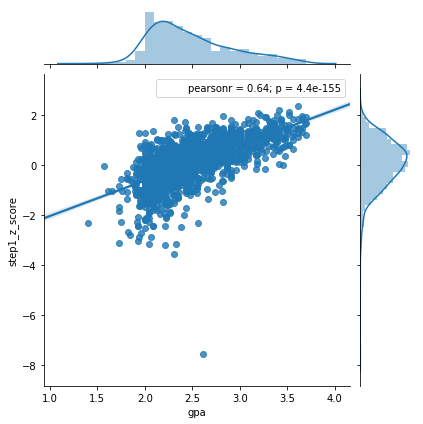

In [7]:
sns.jointplot(df['gpa'], df['step1_z_score'], kind='reg');


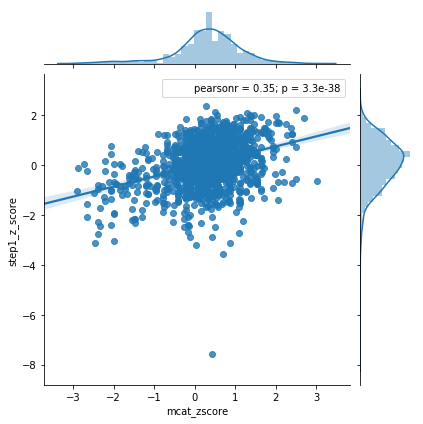

In [8]:
sns.jointplot(df['mcat_zscore'], df['step1_z_score'], kind='reg');

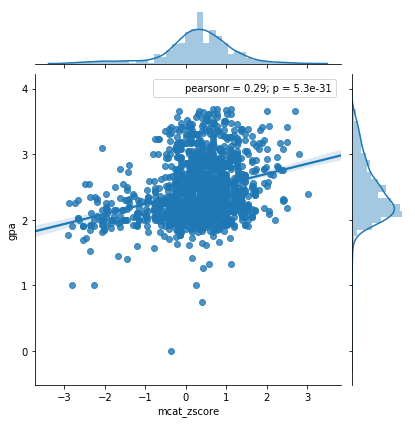

In [9]:
sns.jointplot(df['mcat_zscore'], df['gpa'], kind='reg');

GPA and MCAT z-scores are predictors for STEP1 z-scores.  GPA seems to be a more important predictor than MCAT z-scores. 

#### Course Grade Features

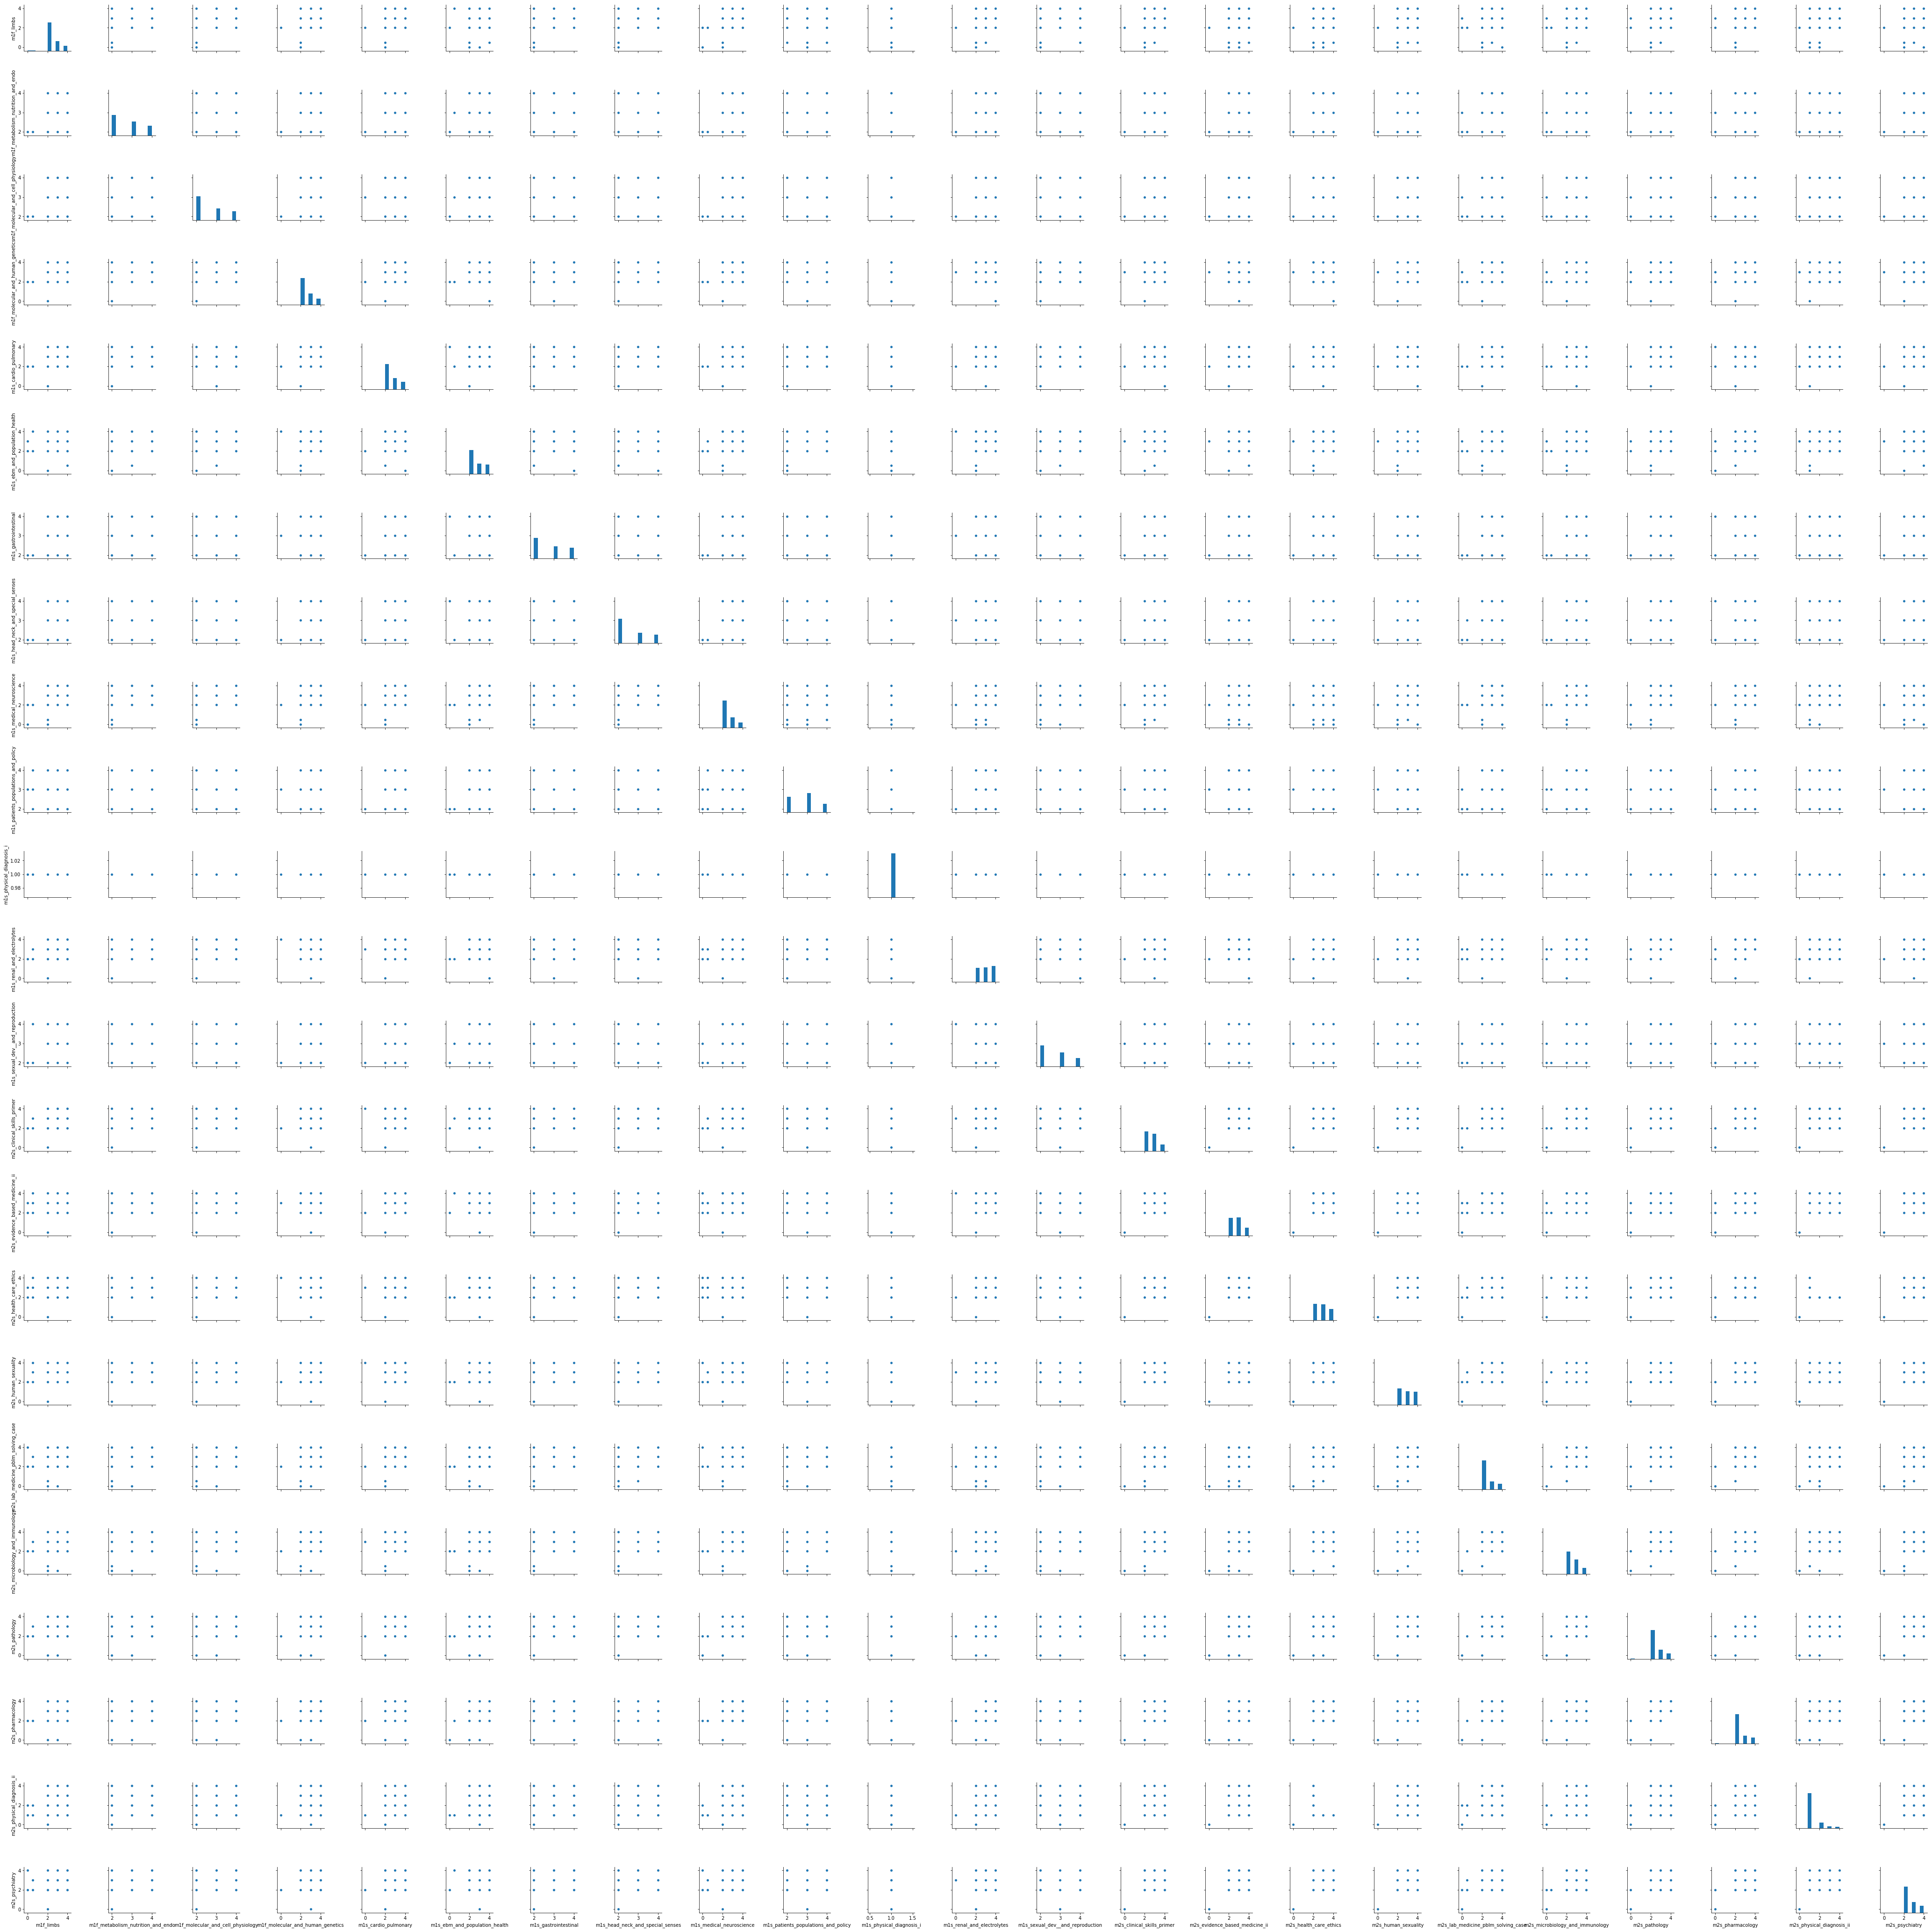

In [10]:
temp = df.loc[:,'m1f_limbs':'m2s_psychiatry']

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp = temp.dropna()
sns.pairplot(temp)

From these scatter plots, it appears that many of our courses may exhibit collinearity.  See below for an example between the courses m1f_limbs and m1f_metabolism_and_nutrition_and_endo.

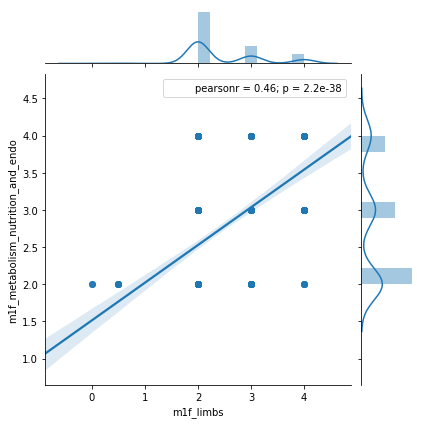

In [11]:
sns.jointplot(temp['m1f_limbs'], temp['m1f_metabolism_nutrition_and_endo'], kind='reg');

Many courses have similar grade distributions.  We see that some pairs of courses are correlated (a higher grade in one course generally leads to a higher grade in another course).  These course grade features seem to exhibit collinearity.  If this is the case, PCA for these features would be appropriate in the machine learning phase.

## 3. biochem_likelyhood Feature

GU Med School is interested in knowing if a student taking biochemistry at the undergrad level is a predictor of STEP1 z-score.    

biochem_likelyhood values:  
1 - definitely took Biochem  
2 - likely took Biochem  
3 - possibly took Biochem  
4 - very unlikely took Biochem  

In [12]:
df['biochem_likelyhood'].value_counts()

3.0    789
4.0    736
1.0    180
2.0     46
Name: biochem_likelyhood, dtype: int64

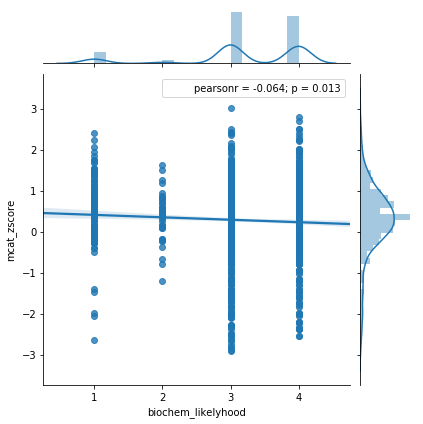

In [61]:
sns.jointplot(df['biochem_likelyhood'], df['mcat_zscore'], kind='reg');

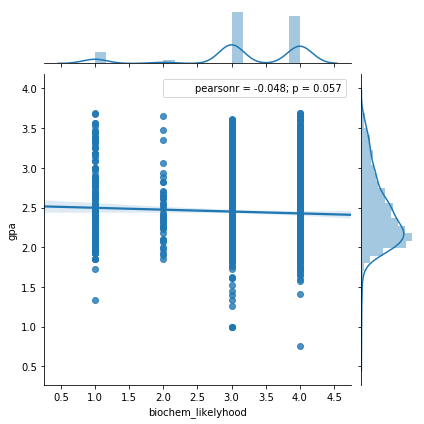

In [62]:
sns.jointplot(df['biochem_likelyhood'], df['gpa'], kind='reg');

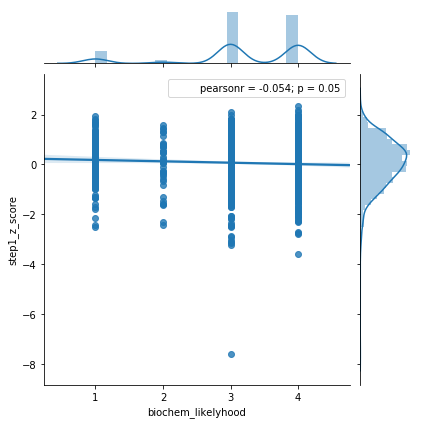

In [60]:
sns.jointplot(df['biochem_likelyhood'], df['step1_z_score'], kind='reg');

biochem_likelyhood is very weakly, negatively correlated with MCAT z-score, GPA, and STEP1 z-score.

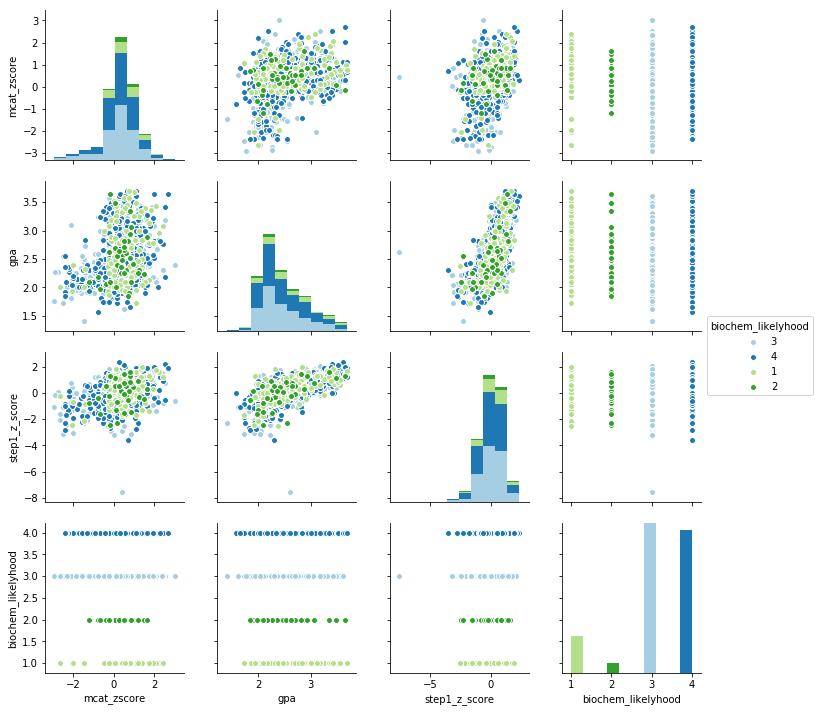

In [14]:
temp = df.loc[:,['mcat_zscore','gpa', 'step1_z_score','biochem_likelyhood']]
temp = temp.dropna()
sns.pairplot(temp, hue='biochem_likelyhood', hue_order=[3,4,1,2], palette='Paired');


There is some clustering of the green points (definitely, likely) for MCAT z-scores and STEP1 z-scores.  It appears that the definitely and likely groups have a higher expected MCAT z-score.  They also appear to have a higher expected STEP1 z-score, but it doesn't seem to be by much. 

In [15]:
pd.pivot_table(df, values=['mcat_zscore','step1_z_score','gpa'], index='biochem_likelyhood', 
               aggfunc=('count', 'mean','std'))

gpa                     mcat_zscore                      \
                   count      mean       std       count      mean       std   
biochem_likelyhood                                                             
1.0                  160  2.513438  0.483977         158  0.518300  0.744062   
2.0                   42  2.468762  0.411246          41  0.411138  0.582066   
3.0                  702  2.438571  0.438118         675  0.204209  0.911266   
4.0                  651  2.434052  0.434776         625  0.289628  0.811452   

                   step1_z_score                      
                           count      mean       std  
biochem_likelyhood                                    
1.0                          139  0.226808  0.926023  
2.0                           40 -0.009688  1.018282  
3.0                          590  0.058070  0.962223  
4.0                          561  0.028439  0.912162

In [16]:
# One-way ANOVA - mcat_zscore mean

mask_1 = (df['biochem_likelyhood'] == 1)
mask_2 = (df['biochem_likelyhood'] == 2)
mask_3 = (df['biochem_likelyhood'] == 3)
mask_4 = (df['biochem_likelyhood'] == 4)

definitely = df[mask_1]['mcat_zscore'].dropna()
likely = df[mask_2]['mcat_zscore'].dropna()
possibly = df[mask_3]['mcat_zscore'].dropna()
unlikely = df[mask_4]['mcat_zscore'].dropna()

# performing both parametric and non-parametric versions of this test - the data may be non-normal or
# exhibit heteroscedasticity 

print(sps.f_oneway(definitely, likely, possibly, unlikely))
sps.kruskal(definitely, likely, possibly, unlikely)

F_onewayResult(statistic=6.332317465942616, pvalue=0.00028897902836976105)


KruskalResult(statistic=17.57931814107116, pvalue=0.0005370527506697029)

The one-way ANOVA and Kruskal-Wallis H-test for independent samples give us similar results.  Our data grouped by biochem_likelyhood have different means (ANOVA) and medians (Kruskal-Wallis).  Now we need to look at each pairing of groups to determine which groups have different means.  Since the biochem_likelyhood = 2 data set has a small size, we will have to check if this group is approximately normal before running the hypothesis tests. 

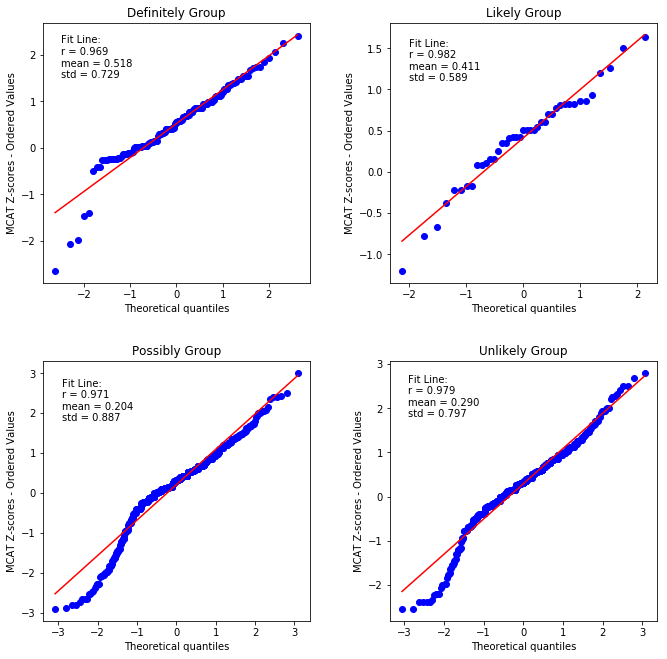

In [17]:
# Probability Plot to check if our data groups by biochem_likelyhood are normal 
# Note: For the fit line, the intercept is the location (ie. mean) and the slope is the scale (ie. standard deviation)
# for the fitted normal distribution.

figure = plt.figure(figsize=(11,11))
plt.subplot(2,2,1)
res_d = sps.probplot(definitely, fit=True, plot=plt)
plt.title("Definitely Group")
plt.ylabel("MCAT Z-scores - Ordered Values")
plt.text(-2.5,1.5,'Fit Line:\nr = %.3f\nmean = %.3f\nstd = %.3f' 
         %(res_d[1][2], res_d[1][1], res_d[1][0]))

plt.subplot(2,2,2)
res_l = sps.probplot(likely, fit=True, plot=plt)
plt.title("Likely Group")
plt.ylabel("MCAT Z-scores - Ordered Values")
plt.text(-2,1.1,'Fit Line:\nr = %.3f\nmean = %.3f\nstd = %.3f' 
         %(res_l[1][2], res_l[1][1], res_l[1][0]))

plt.subplot(2,2,3)
res_p = sps.probplot(possibly, fit=True, plot=plt)
plt.title("Possibly Group")
plt.ylabel("MCAT Z-scores - Ordered Values")
plt.text(-2.9,1.8,'Fit Line:\nr = %.3f\nmean = %.3f\nstd = %.3f' 
         %(res_p[1][2], res_p[1][1], res_p[1][0]))

plt.subplot(2,2,4)
res_u = sps.probplot(unlikely, fit=True, plot=plt)
plt.title("Unlikely Group")
plt.ylabel("MCAT Z-scores - Ordered Values")
plt.text(-2.9,1.8,'Fit Line:\nr = %.3f\nmean = %.3f\nstd = %.3f' 
         %(res_u[1][2], res_u[1][1], res_u[1][0]))

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

The above probability plots tell us that each data set is approximately normal.  The left tails in each set are a bit longer than the normal distribution, but each has a very strong correlation coefficient to the normal distribution fit line.  Thus, to determine which groups have different means, we can use two independent samples t-tests.  Our data sets do have different variances though, so specifically we will use Welch's t-test.

In [18]:
# Investigate which groups are different for expected mcat_zscore by using Welch's unequal variances t-test. 

# Definitely vs Likely
print(sps.ttest_ind(definitely, likely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, likely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs Possibly
print(sps.ttest_ind(definitely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs. Unlikely
print(sps.ttest_ind(definitely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Likely vs Possibly
print(sps.ttest_ind(likely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# likely vs unlikely
print(sps.ttest_ind(likely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# possibly vs unlikely
print(sps.ttest_ind(possibly, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(possibly, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=0.9878660169785859, pvalue=0.3262900338248014)
CI = (-0.10, 0.33)
Ttest_indResult(statistic=4.564898077234103, pvalue=7.505165647487705e-06)
CI = (0.17, 0.45)
Ttest_indResult(statistic=3.387266469411049, pvalue=0.0008154091154165245)
CI = (0.10, 0.36)
Ttest_indResult(statistic=2.12375409402315, pvalue=0.038400326614092345)
CI = (0.02, 0.41)
Ttest_indResult(statistic=1.258856743610899, pvalue=0.21383678176412077)
CI = (-0.06, 0.31)
Ttest_indResult(statistic=-1.7874223559325038, pvalue=0.07410285133191548)
CI = (-0.18, 0.00)


These tests and 95% confidence intervals tell us that the following pairs have significant differences in expected MCAT z-score (at the 0.05 significance level):

1. Definitely and Possibly. Definitely has the higher mean and we are 95% confident that the difference of means is in the interval (0.17, 0.45).
2. Definitely and Unlikely. Definitely has the higher mean and we are 95% confident that the difference of means is in the interval (0.10, 0.36).
3. Likely and Possibly. Likely has the higher mean and we are 95% confident that the difference of means is in the interval (0.02, 0.41).

Possibly and Unlikely most likely have a difference in expected MCAT z-scores.  Possibly has the lower mean and we are 95% confident the the difference of means is in the interval (-0.18, 0.00).  However, it is also possible that these groups may not have different means. 

Therefore, we can conclude that biochem_likelyhood does impact expected MCAT z-score. Specifically, students who have definitely taken Biochem do perform better on the MCAT than students who have possibly taken Biochem and students for whom it is unlikely that they have taken Biochem.

Next, we look at if biochem_likelyhood has an effect on expected GPA and STEP1 z-score.

In [19]:
# One-way ANOVA - gpa mean

definitely = df[mask_1]['gpa'].dropna()
likely = df[mask_2]['gpa'].dropna()
possibly = df[mask_3]['gpa'].dropna()
unlikely = df[mask_4]['gpa'].dropna()

# performing both parametric and non-parametric versions of this test - the data may be non-normal or 
# exhibit heteroscedasticity  

print(sps.f_oneway(definitely, likely, possibly, unlikely))
sps.kruskal(definitely, likely, possibly, unlikely)

F_onewayResult(statistic=1.508645815560539, pvalue=0.2104422035651285)


KruskalResult(statistic=2.980046172819959, pvalue=0.39471190649524257)

In [20]:
# Investigate which groups are different for expected gpa by using Welch's unequal variances t-test. 

# Definitely vs Likely
print(sps.ttest_ind(definitely, likely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, likely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs Possibly
print(sps.ttest_ind(definitely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs. Unlikely
print(sps.ttest_ind(definitely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Likely vs Possibly
print(sps.ttest_ind(likely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# likely vs unlikely
print(sps.ttest_ind(likely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# possibly vs unlikely
print(sps.ttest_ind(possibly, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(possibly, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=0.6029119146145898, pvalue=0.548417672007769)
CI = (-0.09, 0.19)
Ttest_indResult(statistic=1.796144164183268, pvalue=0.07383012222884786)
CI = (-0.01, 0.16)
Ttest_indResult(statistic=1.8953463784101447, pvalue=0.059321815155399374)
CI = (-0.00, 0.15)
Ttest_indResult(statistic=0.46040816662318834, pvalue=0.6473579891442133)
CI = (-0.10, 0.16)
Ttest_indResult(statistic=0.5282836878011831, pvalue=0.5997823448764141)
CI = (-0.08, 0.17)
Ttest_indResult(statistic=0.19032434675881302, pvalue=0.8490837013402859)
CI = (-0.04, 0.05)


These tests and 95% confidence intervals tell us that the following pairs most likely have a difference in expected GPA: 

1. Definitely and Possibly. Definitely has the higher mean and we are 95% confident that the difference of means is in the interval (-0.01, 0.16).
2. Definitely and Unlikely. Definitely has the higher mean and we are 95% confident that the difference of means is in the interval (-0.00, 0.15).

However, it is also possible that both of these pairs may not have different means. 

Therefore, we can conclude that biochem_likelyhood does not have a high impact on expected GPA but could have somewhat of an impact. Specifically, students who have definitely taken Biochem do most likely earn a higher expected GPA than students who have possibly taken Biochem and students for whom it is unlikely that they have taken Biochem.
 

In [21]:
# One-way ANOVA - step1_z_score mean

definitely = df[mask_1]['step1_z_score'].dropna()
likely = df[mask_2]['step1_z_score'].dropna()
possibly = df[mask_3]['step1_z_score'].dropna()
unlikely = df[mask_4]['step1_z_score'].dropna()

# performing both parametric and non-parametric versions of this test - the data may be non-normal or
#exhibit heteroscedasticity  

print(sps.f_oneway(definitely, likely, possibly, unlikely))
sps.kruskal(definitely, likely, possibly, unlikely)

F_onewayResult(statistic=1.745668788344296, pvalue=0.15579900562871357)


KruskalResult(statistic=5.866106089799266, pvalue=0.11830930817407732)

In [22]:
# Investigate which groups are different for expected step1_z_score by using Welch's unequal variances t-test. 

# Definitely vs Likely
print(sps.ttest_ind(definitely, likely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, likely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs Possibly
print(sps.ttest_ind(definitely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Definitely vs. Unlikely
print(sps.ttest_ind(definitely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(definitely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# Likely vs Possibly
print(sps.ttest_ind(likely, possibly, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, possibly, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# likely vs unlikely
print(sps.ttest_ind(likely, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(likely, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

# possibly vs unlikely
print(sps.ttest_ind(possibly, unlikely, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  
low, high = bootstrap_CI(possibly, unlikely, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=1.3201636313052019, pvalue=0.1918940080903034)
CI = (-0.10, 0.58)
Ttest_indResult(statistic=1.9181620058622624, pvalue=0.05642209615361423)
CI = (-0.00, 0.34)
Ttest_indResult(statistic=2.2676563697933747, pvalue=0.024371048411179912)
CI = (0.03, 0.36)
Ttest_indResult(statistic=-0.40865734350349503, pvalue=0.6847799025544165)
CI = (-0.38, 0.26)
Ttest_indResult(statistic=-0.23030909903650942, pvalue=0.8189292864097562)
CI = (-0.35, 0.27)
Ttest_indResult(statistic=0.5363233398193026, pvalue=0.5918389187290845)
CI = (-0.08, 0.13)


These tests and 95% confidence intervals tell us that the following pairs have significant differences in expected STEP1 z-score (at the 0.05 significance level):

1. Definitely and Unlikely. Definitely has the higher mean and we are 95% confident that the difference of means is in the interval (0.03, 0.36).

Definitely and Possibly most likely have a difference in expected MCAT z-scores.  Definitey has the higher mean and we are 95% confident the the difference of means is in the interval (-0.00, 0.34).  However, it is also possible that these groups may not have different means. 

Therefore, we can conclude that biochem_likelyhood does have an impact on expected STEP1 z-score. Specifically, students who have definitely taken Biochem do perform better on STEP1 than students for whom it is unlikely that they have taken Biochem.


### Conclusion

Summary of how biochem_likelyhood impacts expected MCAT z-score, GPA, and STEP1 z-score.

1. MCAT z-score: large impact
2. GPA: possible small impact
3. STEP1 z-score: medium impact


## 4. Classification - class selection

We potentially can evaluate multiple classification problems for this data.
1. Classify students into two classes predicting target_indicator.
2. Classify students into two classes predicting step1_pass_indicator.
3. Classify students into three classes predicting likelyhood of passing STEP1:  unlikely, likely, highly likely.  We need to form the classes for this problem based on step1_z_score.


In [23]:
df['target_indicator'].value_counts()

0    1682
1      95
Name: target_indicator, dtype: int64

In [24]:
df['step1_pass_indicator'].value_counts()

1.0    1323
0.0      29
Name: step1_pass_indicator, dtype: int64

In [25]:
# students who did not pass STEP1

mask = (df['step1_pass_indicator'] == 0)
df[mask]['step1_z_score']

59     -2.880992
92     -2.012125
154    -3.171981
161    -2.114345
201    -2.267674
285    -2.898022
352    -2.185687
360    -2.090709
416    -2.693286
449    -2.427344
478    -3.118792
495    -2.427344
505    -2.427344
560    -7.568463
681    -2.325039
693    -2.449413
702    -3.035862
723    -2.508058
770    -3.568708
881    -2.501289
897    -3.149507
957    -3.209393
961    -2.730306
994    -1.708166
1050   -1.620041
1089   -2.790446
1103   -1.708166
1179   -1.796291
1257   -2.459929
Name: step1_z_score, dtype: float64

In [26]:
# students who did not pass STEP1

df[mask]['step1_z_score'].describe()

count    29.000000
mean     -2.684301
std       1.063228
min      -7.568463
25%      -2.898022
50%      -2.459929
75%      -2.185687
max      -1.620041
Name: step1_z_score, dtype: float64

In [27]:
# students who passed STEP1

mask = (df['step1_pass_indicator'] == 1)
df['step1_z_score'][mask].describe()

count    1323.000000
mean        0.118904
std         0.847783
min        -2.320968
25%        -0.476083
50%         0.144215
75%         0.717413
max         2.359992
Name: step1_z_score, dtype: float64

The pass cut-offs depend on the year, but the maximum non-passing z-score is -1.62.  We want to include a buffer in the unlikely class to also catch students who could potentially be close to the pass/fail cutoff.  These z-scores are already normalized so we suggest the following.
1. unlikely: STEP1 z-score below -1.
2. likely: STEP1 z-score between -1 and 1 (inclusive).
3. highly likely: STEP1 z-score above 1.

In other words, classes are created by the number of standard deviations from the mean.

In [28]:
# count how many z-scores fall in each class: below -1, between -1 to 1, above 1

unlikely = (df['step1_z_score'] < -1).sum()
highly_likely = (df['step1_z_score'] > 1).sum()
likely, num_features = df.query('step1_z_score >= -1 & step1_z_score <= 1').shape

print('Class frequencies\n unlikely: %d\n likely: %d\n highly likely: %d\n' % (unlikely, likely, highly_likely))

Class frequencies
 unlikely: 171
 likely: 967
 highly likely: 214



Each of these classification problems will suffer from class imbalance.  If these models are evaluated in the ML phase, we may need to address this issue.

## 5. Machine Learning Recommendations 

In the machine learning phase we will try a variety of models to predict our target/explain which students either fail STEP1 or could be close to failing STEP1.  Models to investigate include those we looked at during class.  To summarize this notebook, we note the following specifics on models to potentially investigate:

#### Regression Problems:
1. Linear regression to predict STEP1 scores.
2. Logistic regression to predict target_indicator.
3. Logistic regression to predict step1_pass_indicator.

#### Classification Problems:
1. Classification to predict target_indicator.
2. Classifcation to predict step1_pass_indicator.
3. Classification into STEP1 score ranges by potential to pass: unlikely, likely, highly likely.
4. Each of these models will have a class imbalance problem.

#### Feature Selection:
1. PCA on course grade features.

Due to ethical concerns, we will not be using race or gender in the ML phase.



## 6. Questions We Can Answer With This Data / Feature Analysis

#### Does having at least one science undergrad major affect MCAT z-score, GPA, and/or STEP1 z-score?

In [29]:
# Calculate number of bachelors majors in Science 

bachelors_df = df[['bachelor_1', 'bachelor_2', 'bachelor_3']].copy()
num_bachelors = bachelors_df.notnull().sum(axis=1)

# Converting Medicine majors into Science majors
mask_med = (bachelors_df == 'Medicine')
bachelors_df[mask_med] = 'Science'

# Count number of science majors per student
mask_sci = (bachelors_df == 'Science')
sci_umajor = bachelors_df[mask_sci].notnull().sum(axis=1)
sci_umajor[sci_umajor > 1] = 1 

# Change the entries for students with no bachelors degree (missing data) from 0 to NaN 
mask_no_bachelors = (num_bachelors == 0)
sci_umajor[mask_no_bachelors] = float('NaN')

df['science_umajor'] = sci_umajor

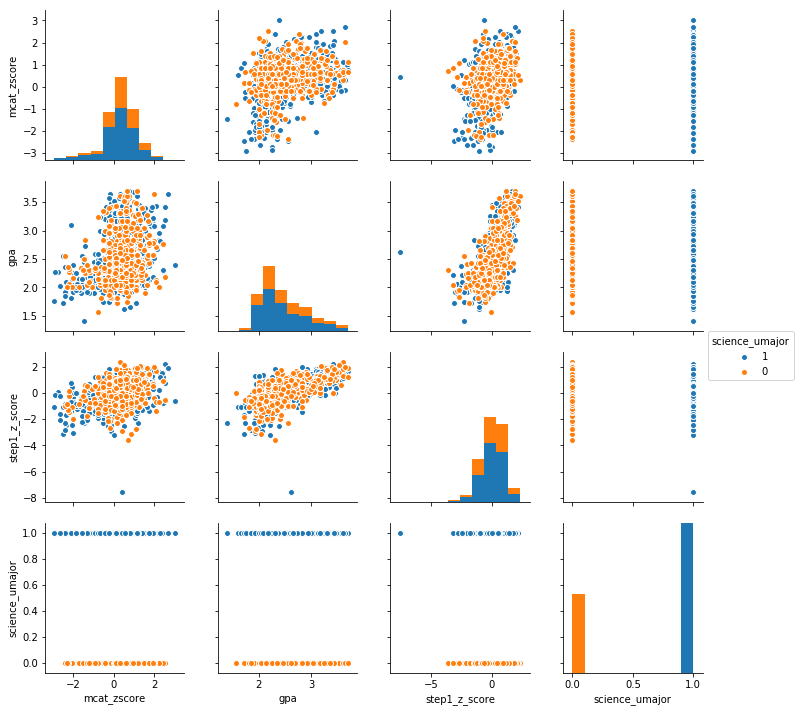

In [30]:
temp = df[['mcat_zscore','gpa','step1_z_score','science_umajor']].copy()

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp=temp.dropna()
sns.pairplot(temp, hue='science_umajor', hue_order=[1,0])

From these results, it is unlikely that having a science undergrad degree is a predictor for expected med school GPA, or STEP1 z-scores.  There is some clustering by science_undergrad for MCAT z-scores.  It appears that students with a science major may have a slightly higher expected MCAT z-score.


In [31]:
pd.pivot_table(df, values=['mcat_zscore','step1_z_score','gpa'], index='science_umajor', 
               aggfunc=('count', 'mean','std'))

gpa                     mcat_zscore                      \
               count      mean       std       count      mean       std   
science_umajor                                                             
0.0              517  2.471809  0.438493         510  0.368302  0.779268   
1.0             1042  2.431990  0.441418         993  0.232395  0.880956   

               step1_z_score                      
                       count      mean       std  
science_umajor                                    
0.0                      451  0.099370  0.943188  
1.0                      882  0.042259  0.938109

In [32]:
# Welch's unequal variances t-test - step1_z_score mean

mask_no = (df['science_umajor'] == 0)
mask_yes = (df['science_umajor'] == 1)

no_sci = df[mask_no]['step1_z_score']
sci = df[mask_yes]['step1_z_score']

print(sps.ttest_ind(no_sci, sci, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  

low, high = bootstrap_CI(no_sci, sci, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=1.0478944474616618, pvalue=0.29496779985786775)
CI = (-0.05, 0.16)


In [33]:
# Welch's unequal variances t-test - gpa mean

no_sci = df[mask_no]['gpa']
sci = df[mask_yes]['gpa']

print(sps.ttest_ind(no_sci, sci, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  

low, high = bootstrap_CI(no_sci, sci, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=1.6842810602204297, pvalue=0.09242870372615589)
CI = (-0.00, 0.08)


In [34]:
#  Welch's unequal variances t-test - mcat_zscore

no_sci = df[mask_no]['mcat_zscore']
sci = df[mask_yes]['mcat_zscore']

sps.ttest_ind(no_sci, sci, equal_var=False, nan_policy='omit')


Ttest_indResult(statistic=3.06027822837701, pvalue=0.002262839035446145)

In [35]:
# Calculate bootstrapped CI for difference in MCAT expected scores 

low, high = bootstrap_CI(no_sci, sci, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))


CI = (0.05, 0.23)


The pivot table, hypothesis tests, and 95% confidence intervals tell us the following: (We use alpha = 0.05.)

1.  Having a science undergraduate degree does not have a statistically significant impact on expected (average) STEP1 z-score. 
2.  Having a science undergraduate degree most likely has a statistically significant impact on GPA expected (average) value.  Students without a science major have the higher mean and we are 95% confident the the difference of means is in the interval (-0.00, 0.08).  However, it is also possible that these groups may not have different means. 
3.  Having a science undergraduate degree does have a statistically significant impact on MCAT z-score expected (average) value.  Students without a science undergrad degree have the higher MCAT z-score expected value.  We are 95% confident that the difference of means is in the interval (0.05, 0.23).

#### Does having a masters degree affect MCAT z-score, GPA, and/or STEP1 z-score?

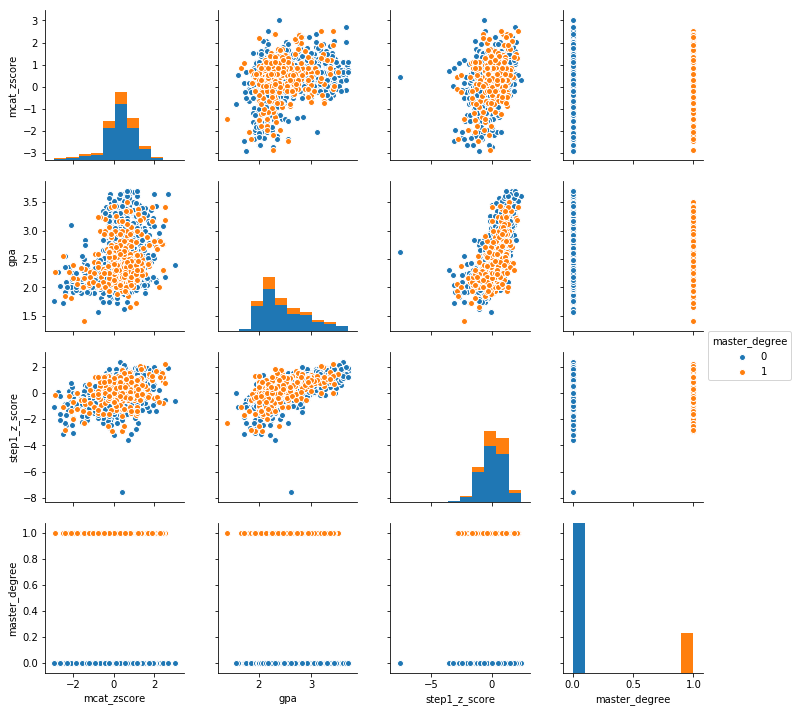

In [36]:
temp = df[['mcat_zscore','gpa','step1_z_score','master_degree']].copy()

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp=temp.dropna()
sns.pairplot(temp, hue='master_degree')

It appears that having a masters degree could potentially be a predictor for MCAT scores, med school GPA, or STEP1 z-scores.  There is some evidence of clustering by master_degree but we need further investigation.


In [37]:
pd.pivot_table(df, values=['mcat_zscore','step1_z_score','gpa'], index='master_degree', 
               aggfunc=('count', 'mean', 'std'))

gpa                     mcat_zscore                      \
              count      mean       std       count      mean       std   
master_degree                                                             
0              1253  2.459193  0.451301        1191  0.275122  0.819718   
1               326  2.392279  0.418041         326  0.302975  0.945222   

              step1_z_score                      
                      count      mean       std  
master_degree                                    
0                      1082  0.037156  0.948707  
1                       270  0.145420  0.923329

In [38]:
# Welch's unequal variances t-test - step1_z_score mean

mask_n = (df['master_degree'] == 0)
no_masters = df[mask_n]['step1_z_score']

mask_y = (df['master_degree'] == 1)
masters = df[mask_y]['step1_z_score']

print(sps.ttest_ind(no_masters, masters, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  

low, high = bootstrap_CI(no_masters, masters, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=-1.7140876577542605, pvalue=0.08724671740684381)
CI = (-0.23, 0.01)


In [39]:
# Welch's unequal variances t-test - gpa mean

no_masters = df[mask_n]['gpa']
masters = df[mask_y]['gpa']

sps.ttest_ind(no_masters, masters, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=2.5316146906876904, pvalue=0.011636848026748343)

In [40]:
# Calculate bootstrapped CI for difference in GPA expected scores 

low, high = bootstrap_CI(no_masters, masters, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (0.02, 0.12)


In [41]:
# Welch's unequal variances t-test - mcat_zscore mean

no_masters = df[mask_n]['mcat_zscore']
masters = df[mask_y]['mcat_zscore']

print(sps.ttest_ind(no_masters, masters, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI  

low, high = bootstrap_CI(no_masters, masters, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=-0.48450226887477793, pvalue=0.628256523855047)
CI = (-0.14, 0.08)


The pivot table and hypothesis tests tell us the following:  (We use alpha = 0.05.)

1.  Having a masters degree most likely has a statistically significant impact on expected STEP1 z-score.  Students without a masters have the lower mean and we are 95% confident the the difference of means is in the interval (-0.23, 0.01).  However, it is also possible that these groups may not have different means. 
2.  Having a masters degree does have a statistically significant impact on expected GPA.  Students without a masters degree have the higher expected GPA.  We are 95% confident that the difference of means is in the interval (0.02, 0.12).
3.  Having a masters degree does not have a statistically significant impact on MCAT z-score expected (average) value.  

#### Does gem_indicator affect GPA and/or STEP1 score?

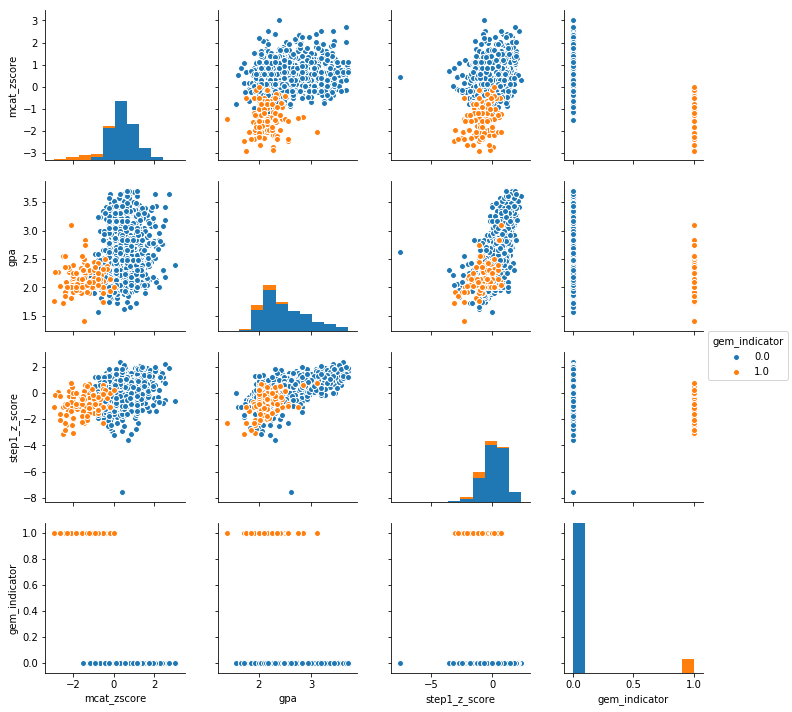

In [42]:
temp = df[['mcat_zscore','gpa','step1_z_score','gem_indicator']].copy()

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp=temp.dropna()
sns.pairplot(temp, hue='gem_indicator')

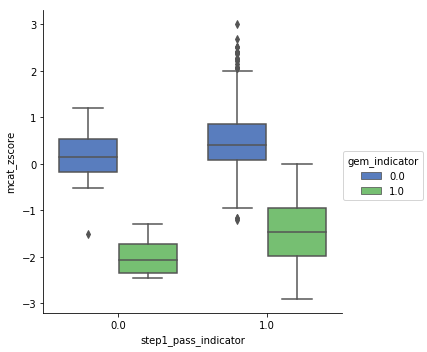

In [43]:
temp = df[['step1_pass_indicator','step1_z_score','gem_indicator','gpa','mcat_zscore']].copy()
temp = temp.dropna()

sns.factorplot(x='step1_pass_indicator', y='mcat_zscore', hue='gem_indicator', data=temp,
                   size=5, kind='box', palette='muted')

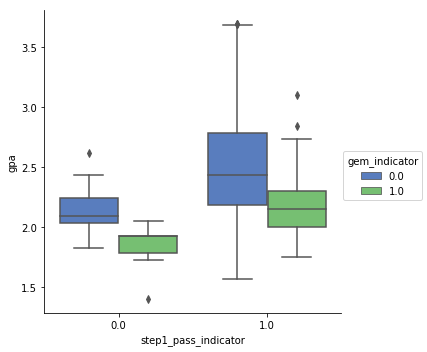

In [44]:
sns.factorplot(x='step1_pass_indicator', y='gpa', hue='gem_indicator', data=temp,
                   size=5, kind='box', palette='muted')

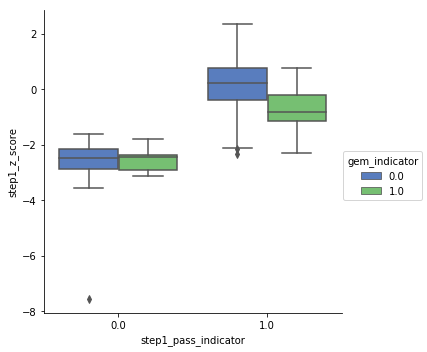

In [45]:
sns.factorplot(x='step1_pass_indicator', y='step1_z_score', hue='gem_indicator', data=temp,
                   size=5, kind='box', palette='muted')

In [46]:
pd.pivot_table(df, values=['mcat_zscore','step1_z_score','gpa'], index=['gem_indicator', 'step1_pass_indicator'], 
               aggfunc=('count', 'mean'))

gpa           mcat_zscore            \
                                   count      mean       count      mean   
gem_indicator step1_pass_indicator                                         
0.0           0.0                     22  2.169302          20  0.168612   
              1.0                   1221  2.522591        1168  0.478834   
1.0           0.0                      7  1.829082           7 -1.997797   
              1.0                    101  2.172704         101 -1.447184   

                                   step1_z_score            
                                           count      mean  
gem_indicator step1_pass_indicator                          
0.0           0.0                             22 -2.722797  
              1.0                           1222  0.188102  
1.0           0.0                              7 -2.563313  
              1.0                            101 -0.718322

In [47]:
# Welch's unequal variances t-test - step1_z_score mean

mask_gem = (df['gem_indicator'] == 1)
gems = df[mask_gem]['step1_z_score']

mask_non_gems = (df['gem_indicator'] == 0)
non_gems = df[mask_non_gems]['step1_z_score']

sps.ttest_ind(gems, non_gems, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-11.491424844543165, pvalue=1.5924279245861904e-21)

In [48]:
# Calculate bootstrapped CI for difference in STEP 1 expected z-scores 

low, high = bootstrap_CI(non_gems, gems, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (0.81, 1.13)


In [49]:
# Welch's unequal variances t-test - gpa mean

gems = df[mask_gem]['gpa']
non_gems = df[mask_non_gems]['gpa']

sps.ttest_ind(gems, non_gems, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-12.46848095966202, pvalue=4.7781597618150957e-26)

In [50]:
# Calculate bootstrapped CI for difference in GPA expected value 

low, high = bootstrap_CI(non_gems, gems, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (0.31, 0.42)


In [51]:
# Welch's unequal variances t-test - mcat_zscore mean

gems = df[mask_gem]['mcat_zscore']
non_gems = df[mask_non_gems]['mcat_zscore']

sps.ttest_ind(gems, non_gems, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-30.037289097740018, pvalue=6.969138988704884e-64)

In [52]:
# Calculate bootstrapped CI for difference in MCAT expected z-scores 

low, high = bootstrap_CI(non_gems, gems, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (1.88, 2.13)


The above t-tests tell us that gem_indicator does have a statistically significantly impact on expected STEP1 z-score, GPA, and MCAT z-score (at the 0.05 significance level).  Specifically,
1. Students not in gems have the higher expected STEP1 z-score.  We are 95% confident that the difference of means is in the interval (0.81, 1.13).
2. Students not in gems have the higher expected GPA.  We are 95% confident that the difference of means is in the interval (0.31, 0.42).
3. Students not in gems have the higher expected MCAT z-score.  We are 95% confident that the difference of means is in the interval (1.88, 2.13).

The results/figures above show that it appears the gems program is successful.  These are students who mainly had lower MCAT scores, but the gap is closing as they continue through med school:
- We are 95% confident that the difference of means for MCAT z-scores is in the interval (1.88, 2.13), and 
- We are 95% confident that the difference of means for STEP1 z-scores is in the interval (0.81, 1.13).  

While their GPAs and STEP1 z-scores are not generally as high as non-gems students, almost all of the gems students passed STEP1. 


#### Does gender affect MCAT z-score, GPA, and/or STEP1 z-score?


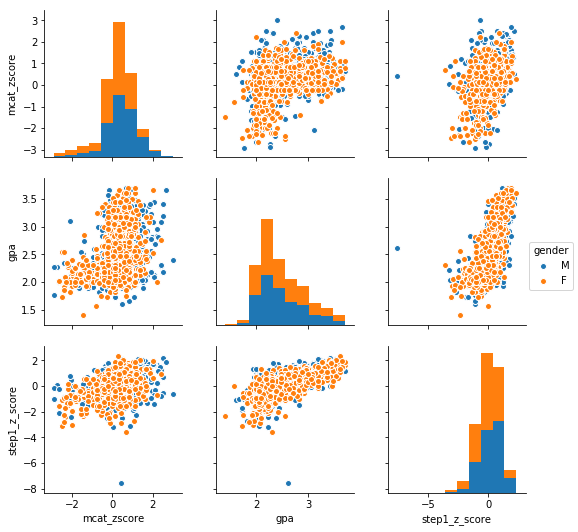

In [53]:
temp = df[['mcat_zscore','gpa','step1_z_score','gender']].copy()

# seaborn pairplot has issues with dropna parameter, so we do this manually first
temp=temp.dropna()
sns.pairplot(temp, hue='gender')

From these results, it appears that gender is not a predictor for expected med school GPA, or STEP1 z-scores.  There is some clustering by gender for MCAT z-scores.  It appears that males may have a slightly higher expected MCAT z-score.

In [54]:
pd.pivot_table(df, values=['mcat_zscore','step1_z_score','gpa'], index='gender', aggfunc=('count', 'mean', 'std'))

gpa                     mcat_zscore                      \
       count      mean       std       count      mean       std   
gender                                                             
F        801  2.457899  0.448978         767  0.129367  0.820127   
M        778  2.432488  0.441469         750  0.436288  0.848493   

       step1_z_score                      
               count      mean       std  
gender                                    
F                680 -0.051751  0.921393  
M                672  0.170619  0.954754

In [55]:
# Welch's unequal variances t-test - step1_z_score mean

mask_m = (df['gender'] == 'M')
males = df[mask_m]['step1_z_score']

mask_f = (df['gender'] == 'F')
females = df[mask_f]['step1_z_score']

sps.ttest_ind(males, females, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=4.356882782550332, pvalue=1.4193642438570432e-05)

In [56]:
# Calculate bootstrapped CI for difference in STEP1 expected z-scores 

low, high = bootstrap_CI(males, females, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (0.13, 0.32)


In [57]:
# Welch's unequal variances t-test - gpa mean

males = df[mask_m]['gpa']
females = df[mask_f]['gpa']

print(sps.ttest_ind(males, females, equal_var=False, nan_policy='omit'))

# Calculate bootstrapped CI 

low, high = bootstrap_CI(males, females, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

Ttest_indResult(statistic=-1.1339670382004445, pvalue=0.2569807475765898)
CI = (-0.07, 0.02)


In [58]:
# Welch's unequal variances t-test - mcat_zscore mean

males = df[mask_m]['mcat_zscore']
females = df[mask_f]['mcat_zscore']

sps.ttest_ind(males, females, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=7.161255637389582, pvalue=1.244135605052049e-12)

In [59]:
# Calculate bootstrapped CI for difference in MCAT expected z-scores 

low, high = bootstrap_CI(males, females, 1000, 95)
print("CI = (%.2f, %.2f)" %(low, high))

CI = (0.22, 0.40)


From these results, gender has a statistically significant impact on the expected (average) MCAT z-score value and the expected STEP1 z-score value.  Men have the higher expected value for each of these features.  Specifically,
- We are 95% confident that the difference of means for MCAT z-scores is in the interval (0.22, 0.40), and 
- We are 95% confident that the difference of means for STEP1 z-scores is in the interval (0.13, 0.32). 

Gender does not have a statistically significant effect on the expected GPA value.

(Note: We used alpha = 0.05.)